<a href="https://colab.research.google.com/github/Chandrika-Pro/AICTE-internship-projects/blob/main/Sentiment%20Analysis%20Using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 1.11GB/s]


In [ ]:

!unzip imdb-dataset-of-50k-movie-reviews.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data=pd.read_csv('IMDB Dataset.csv')

In [ ]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
data.dropna(inplace=True)

In [ ]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
def clean_review(review):
  str=' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
  return str

In [ ]:
from nltk.corpus import stopwords
import re # Import the regular expression module

# Make the stopwords a set for faster lookups
stop_words_set = set(stopwords.words('english'))

def clean_review_optimized(review):
    # Convert to lowercase and remove punctuation
    review = re.sub(r'[^\w\s]', '', review.lower())
    # Split into words and filter out stopwords
    return ' '.join(word for word in review.split() if word not in stop_words_set)

# Apply the optimized function
data['review'] = data['review'].apply(clean_review_optimized)

print(data.head())

                                              review sentiment
0  one reviewers mentioned watching 1 oz episode ...  positive
1  wonderful little production br br filming tech...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically theres family little boy jake thinks...  negative
4  petter matteis love time money visually stunni...  positive


In [ ]:
from wordcloud import WordCloud

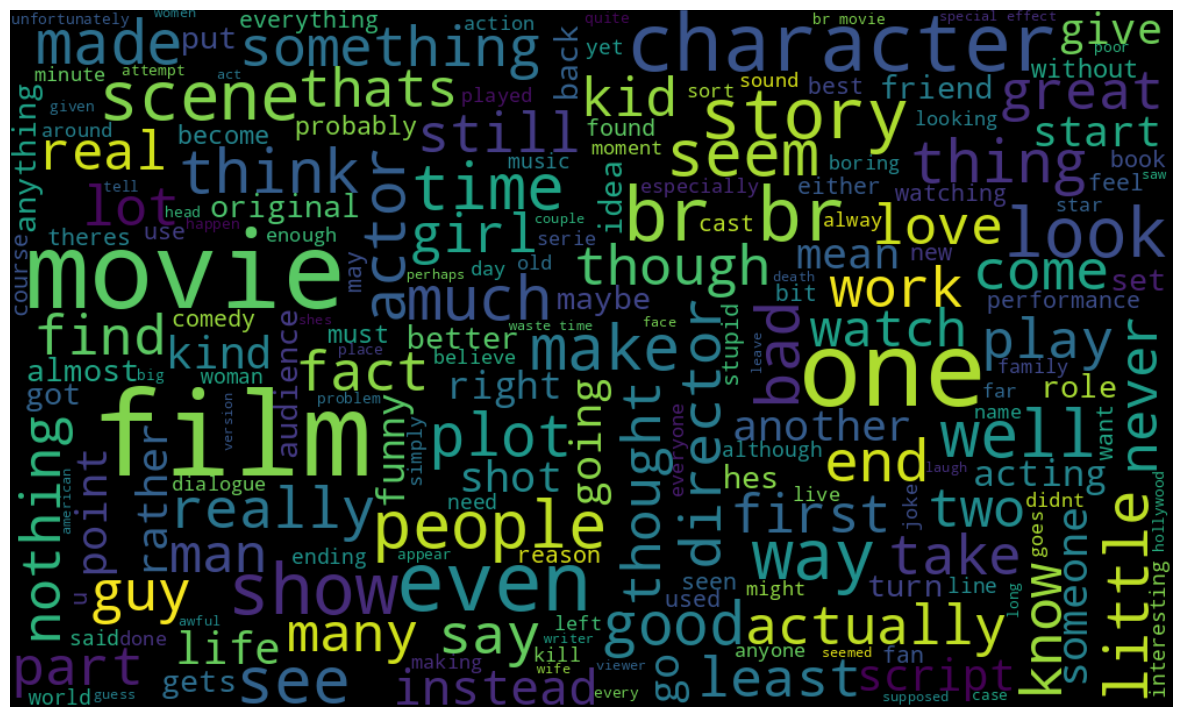

In [ ]:
reviews=' '.join(word for word in data['review'][data['sentiment']=='negative'].astype(str))
wordcloud=WordCloud(width=1000,height=600,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

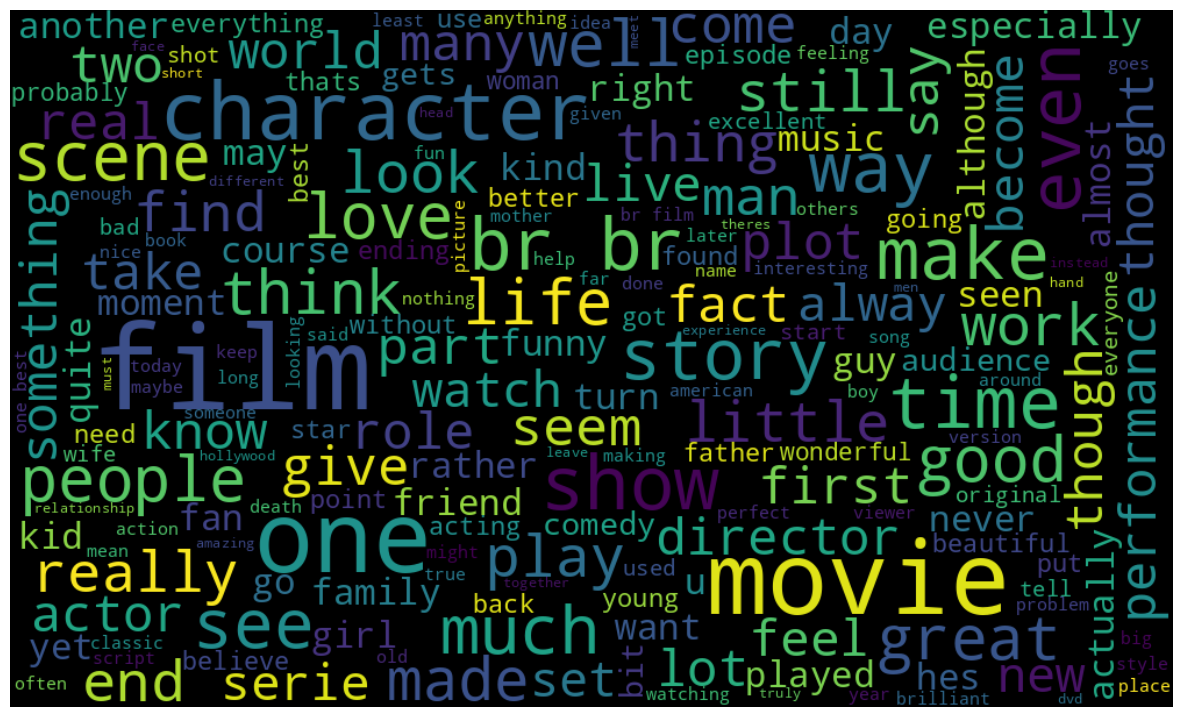

In [ ]:
reviews=' '.join(word for word in data['review'][data['sentiment']=='positive'].astype(str))
wordcloud=WordCloud(width=1000,height=600,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=2500)

In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
reviews_train, reviews_test, sentiment_train, sentiment_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

In [ ]:
reviews_train_cv = cv.fit_transform(reviews_train)
reviews_test_cv = cv.transform(reviews_test)

In [ ]:
model.fit(reviews_train_cv, sentiment_train)

LogisticRegression()

In [ ]:
predict = model.predict(reviews_test_cv)

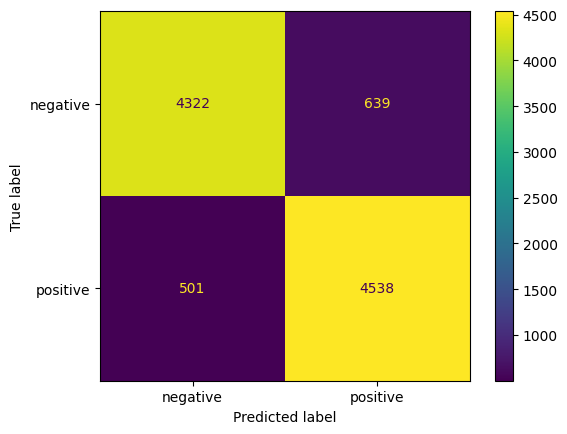

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(sentiment_test,predict,labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [ ]:
import pickle as pk

In [ ]:
pk.dump(model,open('model.pkl','wb'))

In [ ]:
pk.dump(cv, open('vectorizer.pkl', 'wb'))

In [ ]:
import pickle as pk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
# Import other necessary libraries for cleaning/preprocessing if applicable
import re
from nltk.corpus import stopwords

# Assuming the files are in the same directory as your script
model_file_path = 'model.pkl'
vectorizer_file_path = 'vectorizer.pkl'

try:
    # Load the model
    with open(model_file_path, 'rb') as f:
        loaded_model = pk.load(f)
    print("Model loaded successfully.")

    # Load the vectorizer
    with open(vectorizer_file_path, 'rb') as f:
        loaded_vectorizer = pk.load(f)
    print("Vectorizer loaded successfully.")

    # Now you can use both to preprocess new data and make predictions

    # Example of processing new data and making a prediction
    new_reviews = ["This movie was absolutely amazing!", "It was a terrible film."]

    # Apply the same cleaning steps as in your training code
    stop_words_set = set(stopwords.words('english'))

    def clean_review_for_prediction(review):
        review = re.sub(r'[^\w\s]', '', review.lower())
        return ' '.join(word for word in review.split() if word not in stop_words_set)

    cleaned_new_reviews = [clean_review_for_prediction(review) for review in new_reviews]

    # Transform the cleaned new reviews using the loaded vectorizer
    new_reviews_transformed = loaded_vectorizer.transform(cleaned_new_reviews)

    # Make predictions using the loaded model
    predictions = loaded_model.predict(new_reviews_transformed)

    # Interpret the predictions
    sentiment_mapping = {0: 'negative', 1: 'positive'}
    predicted_sentiments = [sentiment_mapping[pred] for pred in predictions]

    print("New reviews:", new_reviews)
    print("Predicted sentiments:", predicted_sentiments)

except FileNotFoundError:
    print("Error: One or both of the pickle files were not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Model loaded successfully.
Vectorizer loaded successfully.
An error occurred: 'positive'


In [ ]:
model = pk.load(open('/content/model.pkl', 'rb'))
vectorizer = pk.load(open('/content/vectorizer.pkl', 'rb'))

In [ ]:
import pickle as pk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords

# Assume your model and vectorizer are already loaded
# For example, from your previous cells:
# model = pk.load(open('/content/model.pkl', 'rb'))
# vectorizer = pk.load(open('/content/vectorizer.pkl', 'rb')) # Assuming this is the correct name for your vectorizer

# Define the cleaning function (should be the same as the one used during training)
stop_words_set = set(stopwords.words('english'))

def clean_review_for_prediction(review):
    review = re.sub(r'[^\w\s]', '', review.lower())
    return ' '.join(word for word in review.split() if word not in stop_words_set)

# Get a new review from the user
new_review = input("Enter a movie review: ")

# Clean the new review
cleaned_new_review = clean_review_for_prediction(new_review)

# Transform the cleaned new review using the loaded vectorizer
# The vectorizer expects a list of documents, so we pass the single review in a list
new_review_transformed = vectorizer.transform([cleaned_new_review])

# Make a prediction using the loaded model
prediction = model.predict(new_review_transformed)

# Interpret the prediction
sentiment_mapping = {'negative': 'NEGATIVE REVIEW', 'positive': 'POSITIVE REVIEW'}
predicted_sentiment = sentiment_mapping[prediction[0]] # prediction is an array, so access the first element

# Print the result
print(f"The review is predicted to be: {predicted_sentiment}")

Enter a movie review: film
The review is predicted to be: POSITIVE REVIEW
